# Convert jupyter notebook to markdown
Jupyter notebook gives us the power to write the code and report togather in single file. We can directly make the report out of the notebook file. We can provide explanations and justifications for code in the markdown of jupyter notebook. We can divide our code into multiple sections and run it. We can directly look at the results of the code without requiring to run the full script. There are enumerous advantages of jupyter notebook. Depending upon your requirements, jupyter notebook can make your life a lot easier.

Many plateforms accept reports in markdown lanuage. Like *Readme.md* file of Github repository. Here Medium also accepts markdown text for blogging. We can directly create the blog out of the juyter notebook file. This blog itself is created out of jupyter notebook. Now about markdown, Markdown is the lightweight markup language. Meaning you can create some decent articles/reports with markdown without the need of installing heavy softwares.

So I will explain you the way to convert the jupyter notebook to markdown. We will use ```nbconvert``` module of python to achieve our goal. But before moving there we will understand how jupyter notebook arranges the data and how we can do some stuffs by our self without the need of ```nbconvert``` module.

## Making Example notebook
---

# Trigonometric functions

Sine, cosine are the most basic trigonometric functions. Other trigonometric functions are derrivatives of these two. Like tangent is the ratio of sine and cosine.

<center>tan(x) = sin(x) / cos(x)</center>

so, we will only show sine and cosine plots here.

## Plot of Sin(x) and Cos(x)

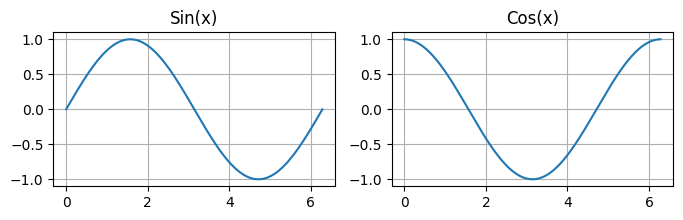

The value of sin(pi/6) is 0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 0-360 degrees converted to radians
x = np.arange(0,360,0.1) * (np.pi/180)
y = np.sin(x)

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(121)
ax.plot(x,y)
ax.set_title('Sin(x)')
ax.grid()

ax = fig.add_subplot(122)
y = np.cos(x)
ax.plot(x,y)
ax.set_title('Cos(x)')
ax.grid()

plt.show()

print(f'The value of sin(pi/6) is {round(np.sin(np.pi/6),3)}')

---
Now we will read this file. When we read the *.ipynb* file it kind of looks like json string, so we will convert the output string using json.

## Reading the *.ipynb* file

In [1]:
import json
filepath = 'notebook1.ipynb'
with open(filepath,'r') as f:
    str1 = f.read()
nb1 = json.loads(str1)
print(f'These are the keys in the dataframe \n{list(nb1.keys())}')

These are the keys in the dataframe 
['cells', 'metadata', 'nbformat', 'nbformat_minor']


here ```nb1['cells']``` contains the main data of the notebook. ```nb1['metadata']``` contains the metadata of the jupyter notebook. These metadata can be defined in the notebook from ```Edit > Edit Notebook Metadata ``` menubar. Other keys are self-explanatory.

```nb1['cells']``` is the list of dictionaries for each of the cells in the juyter notebook. The keys in the dictionary depends upon the type of cell. Below code shows the same fact. Here ```source``` contain the text/code inside the cell. ```metadata``` contains the metadata defined for any particular cell. These metadata can be tags of the cell. Such as *remove-input* tag. We will further see the usage of these metadata afterwords. ```outputs``` contains the output of the code cell.

In [2]:
print('Markdown cell type keys =',list(nb1['cells'][0].keys()))
print('Code cell type keys =',list(nb1['cells'][3].keys()))

Markdown cell type keys = ['cell_type', 'id', 'metadata', 'source']
Code cell type keys = ['cell_type', 'execution_count', 'id', 'metadata', 'outputs', 'source']


### Gathering source

In [3]:
str1 = ''
resources = {}
# we will iterate over all the cells
for cell in nb1['cells']:
    str2 = ''.join(cell['source'])
    # we will see if the cell type is code or markdown
    # and accordingly we will add the source
    if cell['cell_type'] == 'markdown':
        str1 += str2
    # we will enclose the code block within ```py
    elif cell['cell_type'] == 'code':
        str1 = str1 + '```py' + str2 + '``` \n'
        
        d1 = cell['outputs']
        if d1['output_type'] == 
        

In [4]:
len(nb1['cells'][3]['outputs'])

2

In [6]:
d1 = nb1['cells'][3]['outputs']

In [15]:
d1[0].keys()

dict_keys(['data', 'metadata', 'output_type'])

In [14]:
d1[0]['output_type']

'display_data'